In [1]:
import os
import sys
sys.path.append(os.path.abspath('../head_detect'))
sys.path.append(os.path.abspath('../code'))
sys.path.append(os.path.abspath('../tools'))

import numpy as np
from frameROI import FrameROI as  fr
from vgg_face import VGGface 
from face_detector1 import FaceDetector 
from facedetector_evaluation import videoDetectorEvaluation , Video2Frame
from shutil import copyfile,rmtree


from predict import HeadDetector 
from run_vgg import mtcnnFace

rawimg= '../data/test2.jpg'#videoframe/5695231002474224804_veg300_20.jpg'
saveto= '../data/model_evaluation2'



Using TensorFlow backend.


In [2]:
# sys.path

In [3]:
# print(os.getcwd())
# cd ../head_detect/
# print(os.getcwd())
# os.getcwd()

In [3]:
# hd = HeadDetector()

# hd.detect_head(rawimg, exportImg=False, outputpath = "./output/")

def haarcascade_frontalface(rawimg):
    tempdir='../Data/ttemp_imgdir'
    if not os.path.exists(tempdir): 
        os.mkdir(tempdir)
        
    dst= os.path.join(tempdir, os.path.basename(rawimg))
    copyfile(rawimg, dst)
    #-----------
    
    x= mtcnnFace.extract_face(tempdir)
    #-----------
    os.remove(dst)

    return x

haarcascade_frontalface(rawimg)



array([[ 47,  56,  57,  57],
       [566, 173,  33,  33],
       [313,  91,  51,  51],
       [104,  44,  84,  84],
       [346, 139,  63,  63],
       [445, 152,  83,  83],
       [ 53, 178,  75,  75],
       [340, 279,  75,  75],
       [237, 183,  86,  86],
       [586, 261,  91,  91],
       [127, 177,  91,  91]], dtype=int32)

In [4]:

#model= VGGface.detect_roi_fromRawImg#, 
model= haarcascade_frontalface #mtcnnFace.extract_face
# model= FaceDetector.detect_cv2dnn_fromRawImg_conf7 
#------------------------------------------------------------------------------

annotations = model(rawimg) # input rawimage, and return 2d numpy.array [[x,y,w,h]]
print(annotations)

# #create a relative labels for the annotation
labels= np.zeros(annotations.shape[0])
print(labels)

[[ 47  56  57  57]
 [566 173  33  33]
 [313  91  51  51]
 [104  44  84  84]
 [346 139  63  63]
 [445 152  83  83]
 [ 53 178  75  75]
 [340 279  75  75]
 [586 261  91  91]
 [237 183  86  86]
 [127 177  91  91]]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [9]:


#------------------------------------------------------------------------------
# annotate face boundingbox and save
ROI=fr(rawimg, annotations=annotations, labels=labels , saveto_directory=saveto )
ROI.createROIs(crop=0, 
               save=1,
               boundingbox_color=(255,255,0))
#------------------------------------------------------------------------------
# #evaluation 
video='../data/5695231002474224804_veg300.wmv'
annotation_txt= '../data/5695231002474224804_veg300_gt.txt'

vd= Video2Frame(video, saveframe=0, savedir= '../data/model_evaluation2/frame1')

vdE= videoDetectorEvaluation([
                              VGGface.detect_roi_fromRawImg, 
                              FaceDetector.detect_cv2dnn_fromRawImg,
                              FaceDetector.detect_cv2dnn_fromRawImg_conf7,
                              FaceDetector.detect_cv2dnn_fromRawImg_conf3,
                              haarcascade_frontalface
                              ], video,annotation_txt,
                             save= 1, savedir= vd.savedir)

print(vdE.eva)

model: 0 ..
     frame 0 ..
     frame 20 ..
     frame 40 ..
     frame 60 ..
     frame 80 ..
     frame 96 ..
cost time 58.137590169906616s
model: 1 ..
     frame 0 ..
     frame 20 ..
     frame 40 ..
     frame 60 ..
     frame 80 ..
     frame 96 ..
cost time 20.021974086761475s
model: 2 ..
     frame 0 ..
     frame 20 ..
     frame 40 ..
     frame 60 ..
     frame 80 ..
     frame 96 ..
cost time 19.941206216812134s
model: 3 ..
     frame 0 ..
     frame 20 ..
     frame 40 ..
     frame 60 ..
     frame 80 ..
     frame 96 ..
cost time 20.810842752456665s
model: 4 ..
     frame 0 ..
     frame 20 ..
     frame 40 ..
     frame 60 ..
     frame 80 ..
     frame 96 ..
cost time 10.86130690574646s
[(0, <function VGGface.detect_roi_fromRawImg at 0x12143f268>, 58.137590169906616, 0.8459864299359938, 0.9217270409280759), (1, <function FaceDetector.detect_cv2dnn_fromRawImg at 0x149dcb378>, 20.021974086761475, 0.872114622590028, 0.8448502588433205), (2, <function FaceDetector.detect_

In [10]:
vd.frame_num
# vdE.recall_precision[2]
# a test for recall and precision annalyse of single frame
# videoDetectorEvaluation.recall_precision((3180,2160,3), 
#                                         gt_anns= [[4,4,1,1],[40,4,1,1],[47,4,1,1]],
#                                         model_anns= [(4,4,1,1)],
#                                         details= False)

99

In [11]:
import pandas as pd

import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'

In [12]:
_eva= pd.DataFrame(vdE.eva, columns=['idx', 'model','timecost', 'recall','precision'])
_eva['modelname']= pd.Series([m.__name__ for m in _eva.model])
eva= pd.DataFrame(_eva, columns=['idx', 'model','modelname','timecost', 'recall','precision'])
eva

,idx,model,modelname,timecost,recall,precision
0,0,<function VGGface.detect_roi_fromRawImg at 0x1...,detect_roi_fromRawImg,58.137590,0.845986,0.921727
1,1,<function FaceDetector.detect_cv2dnn_fromRawIm...,detect_cv2dnn_fromRawImg,20.021974,0.872115,0.844850
2,2,<function FaceDetector.detect_cv2dnn_fromRawIm...,detect_cv2dnn_fromRawImg_conf7,19.941206,0.857639,0.936366
3,3,<function FaceDetector.detect_cv2dnn_fromRawIm...,detect_cv2dnn_fromRawImg_conf3,20.810843,0.889376,0.767101
4,4,<function haarcascade_frontalface at 0x1501b0048>,haarcascade_frontalface,10.861307,0.460694,0.927611


In [14]:


def bar_graph( ds, plotname='Time consumed per frame', colors='salmon'):
    
    x_ticks= ds['idx']
    my_colrs= colors
    if len(colors)==1 : my_colrs = colors* (len(ds))
    index = np.arange( len(ds))
    plt.bar(index, ds['timecost']/vdE.vf.frame_num ,width=1/2, color= my_colrs)
#     plt.bar(index, ds['recall'], color= 'green')
    plt.xlabel('models', fontsize=10)
    plt.ylabel('time/s/frame', fontsize=10)
    plt.xticks(index, x_ticks, fontsize=10, rotation=0,ha="right")
#     plt.ylim(0 , 0.3)#  
    plt.title(plotname+'\n')
    plt.show()

def bar_group(ds, plotname='Face detection model evaluation'):
    '''
    plot a grouped bar chart
    '''
    # set width of bar
    barWidth = 1/3   # if group of n, then the barWidth = 1/(n+1)

    # set height of bar
    bars1 = ds['recall']
    bars2 = ds['precision']
    x_ticks= ds['idx']

    # Set position of bar on X axis
    r1 = np.arange(len(ds))
    r2 = [x + barWidth for x in r1]

    # Make the plot
    plt.bar(r1, bars1, color='salmon', width=barWidth, edgecolor='white', label='recall')
    plt.bar(r2, bars2, color='lightseagreen', width=barWidth, edgecolor='white', label='precision')

    # Add xticks on the middle of the group bars
    plt.xlabel('model', fontsize=10)
    plt.ylabel(' ', fontsize=10)
    plt.xticks(ticks= [r + (0.5-barWidth) for r in range(len(bars1))], labels=x_ticks,fontsize=10, rotation=0,ha="right")
    # Create legend & Show graphic
    plt.legend(bbox_to_anchor=(1, 1))
    plt.title(plotname+'\n')
    plt.show()
# color=['r','g','b']

def plot_recall_precision(vdE_recall_precision):
    marks=['*','o','.','+','x','H','1','2']
    for i in range(len(vdE.recall_precision)):
        rp= pd.DataFrame( vdE.recall_precision[i],columns=['frame','recall','precision']) 
        rp= rp.sort_values(['recall', 'precision'], ascending=[True, True])

        plt.plot(rp.precision, rp.recall,
                marker= marks[i],
                alpha=0.7,
    #             color= color[i],
                label= 'model{}'.format(i))
    plt.plot([0, 1], [1, 0],'r--')
    plt.legend(loc = 'best')
    plt.xlabel("precision")
    plt.ylabel("recall")
    plt.ylim(0 , 1.1)
    plt.xlim(0 , 1.1)
    plt.title("recall-precision")
    # plt.legend()
    plt.show()



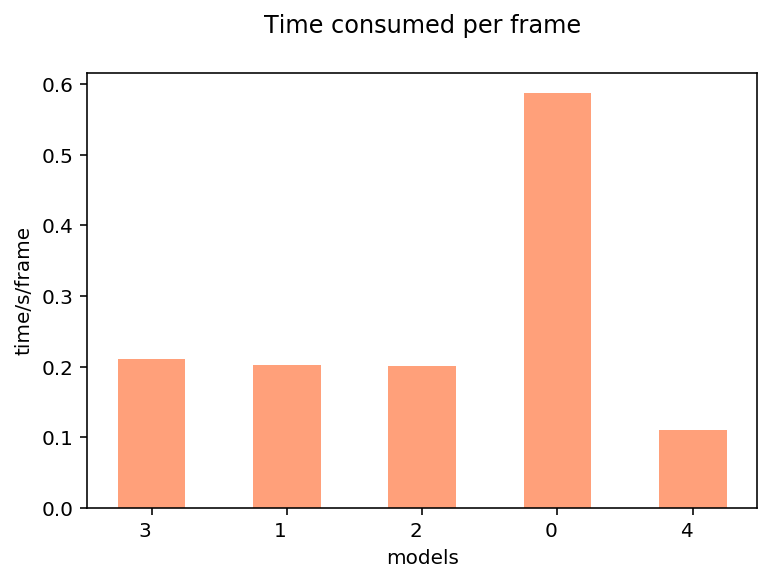

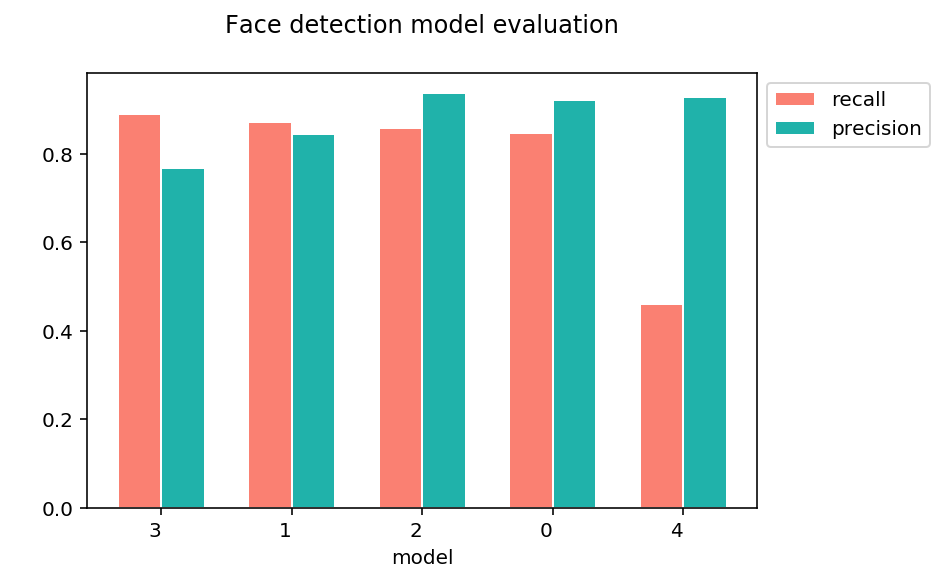

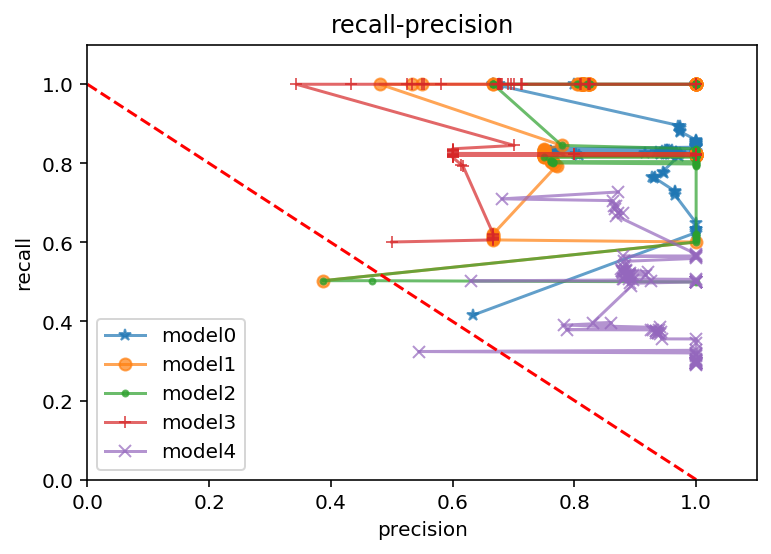

,idx,model,modelname,timecost,recall,precision
3,3,<function FaceDetector.detect_cv2dnn_fromRawIm...,detect_cv2dnn_fromRawImg_conf3,20.810843,0.889376,0.767101
1,1,<function FaceDetector.detect_cv2dnn_fromRawIm...,detect_cv2dnn_fromRawImg,20.021974,0.872115,0.844850
2,2,<function FaceDetector.detect_cv2dnn_fromRawIm...,detect_cv2dnn_fromRawImg_conf7,19.941206,0.857639,0.936366
0,0,<function VGGface.detect_roi_fromRawImg at 0x1...,detect_roi_fromRawImg,58.137590,0.845986,0.921727
4,4,<function haarcascade_frontalface at 0x1501b0048>,haarcascade_frontalface,10.861307,0.460694,0.927611


In [15]:


ds= eva.sort_values(['recall', 'precision'], ascending=[False, True])
bar_graph(ds, colors= ['lightsalmon'])
bar_group(ds) 

plot_recall_precision(vdE.recall_precision)
ds

### Receiver operating characteristic
__The reason__ why I cannot plot a ROC curve is that we don't have a full confusion matrix or we don't have negative ground truth. We have all the TP, FP and FN except for the TN, because the manual annotation can tell us what exactly is a face but cannot tell us what exactly is not a face. When the model detect a false face, that is an FP, but not a TN. 
As the RoC curve represents the correlation between True Positive Rate $ \frac{TP}{TP+ FN}$ (namely recall or TPR) and the False Positive Rate $ \frac{FP}{FP+ TN}$ (FPR). If TN is Not Available, False Positive Rate would be identically 1, to plot the such a curve is also not feasible. 



Additionally, ROC curve can apply well where the observations are balanced between each class, whereas recall-precision curves are appropriate for imbalanced datasets. In the face/head detection scenarioes, we only have true Groundtruth, so I think recall-precision curve are more appropriate for us.

More discussions also can be found [here](https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/) and [here](https://en.wikipedia.org/wiki/Receiver_operating_characteristic)

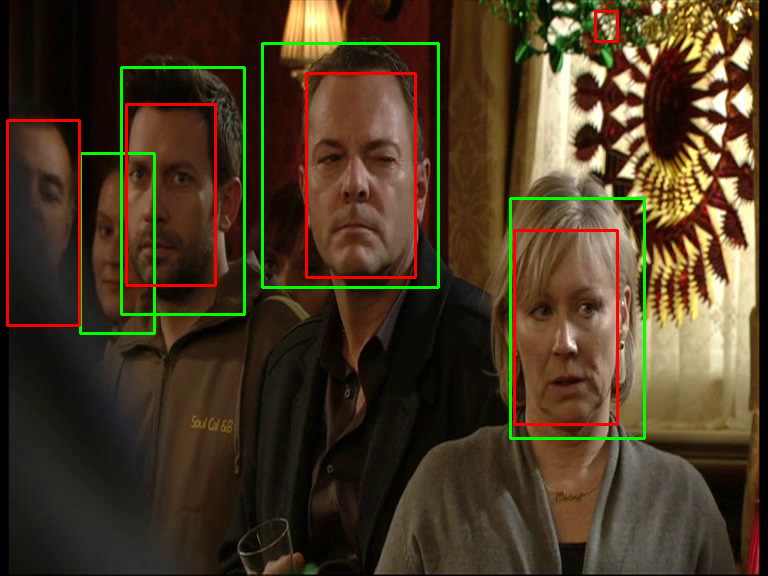

In [21]:

import os 
from IPython.display import Image

Image(filename='../data/5695231002474224804_veg300_frame36_compare_3.png',width=300, height=300) 

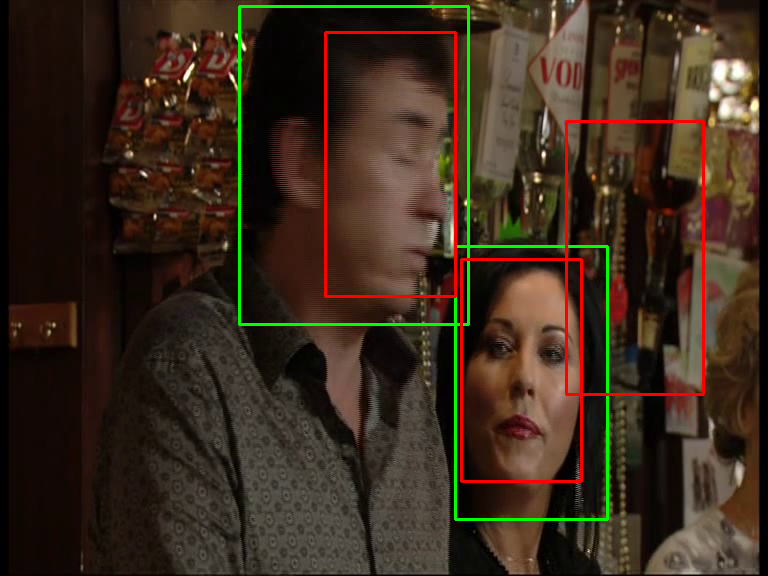

In [22]:
Image(filename='../data/5695231002474224804_veg300_frame1_compare_3.png',width=300, height=300) 

### Evaluation:

Before we start, a bit explanation about the recall and precision metrics. We all familiar with those two in the classification model evaluation. Likewise, we use 
- __recall__ to represent the rate that how many ground truth(manual annotation) head/faces are detected, 
- __precision__ to indicate how accurate that detected faces/heads are mannual annotated (=how much area of the detected faces/heads are included in the groundtruth bondingbox).

As shown in the above charts,

- Firstly, amongst the models we have, the VGG models(model0) is the most inefficient with 0.6 seconds per frame, compared to a average less than 0.2seconds per frame. 
- Secondly, Regarding the time cost, there is a trade off between recall and precision: the better the recall, the worse the precision. 
  
  (see the demonstrations in above cell)

However, I think the recall should be preoritised given our ground truth are correct (99%+), because __when it is a false detected face, it wouldnot have a label, or definitely "non-active". it also would not affect too much to our model training. On the contrary, if we miss a acctually active speaker, then it can make a big difference to the training__. So, given the precision is considerable level( maybe >=90%), choose the highest recall model. 

As a conclusion, amongst the models, the best model is model3: detect_cv2dnn_fromRawImg_conf3  (detect_cv2dnn, with confidence = 0.3)





### Refining the cv2dnn model with our manual annotations

- I have searched and found some result in that job (like [github](https://github.com/RobertMcReed/facewash) ). 
- Written some tools to transfer videofile and gt_txt file to faces that can be fed into training process. [frameROI.paradigm_annotation_fromTxt] (https://github.com/jg39gao/VisualSpeakerIdentification/tree/master/tools)
- While still I haven't got the right way to retrain the model yet.